In [1]:
from utils.visualization import plot_metrics
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch
import torch.optim as optim
import torch.nn as nn
from data import dataset as ds
from models import CustomCNN as cnn
from utils import training as tr
from utils import visualization as vis

In [2]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


True
NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [3]:
train_loader, val_loader = ds.get_CIFAR_10()

Files already downloaded and verified
Files already downloaded and verified


### Evaluating the Model on the Validation Set
Now that the model is trained, let's evaluate its performance on the validation (test) set to see how well it generalizes to unseen data.

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = cnn.CustomCNN()
# Train the model for 1 epoch (modify num_epochs to train longer)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
tr.train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=2, save_path='mini_cnn_model.pth')

Using device: cuda
Tracking training loss: 2.301478624343872
Tracking training accuracy: 0.109375
Tracking training loss: 3.066326856613159
Tracking training accuracy: 0.078125
Tracking training loss: 2.2296903133392334
Tracking training accuracy: 0.21875
Tracking training loss: 2.117119312286377
Tracking training accuracy: 0.25
Tracking training loss: 2.1602892875671387
Tracking training accuracy: 0.1875
Tracking training loss: 2.4492366313934326
Tracking training accuracy: 0.21875
Tracking training loss: 2.350053310394287
Tracking training accuracy: 0.25
Tracking training loss: 2.2629239559173584
Tracking training accuracy: 0.21875
Tracking training loss: 2.1297857761383057
Tracking training accuracy: 0.28125
Tracking training loss: 1.9382768869400024
Tracking training accuracy: 0.359375
Tracking training loss: 2.1569361686706543
Tracking training accuracy: 0.25
Tracking training loss: 2.281245470046997
Tracking training accuracy: 0.234375
Tracking training loss: 2.0775527954101562
T

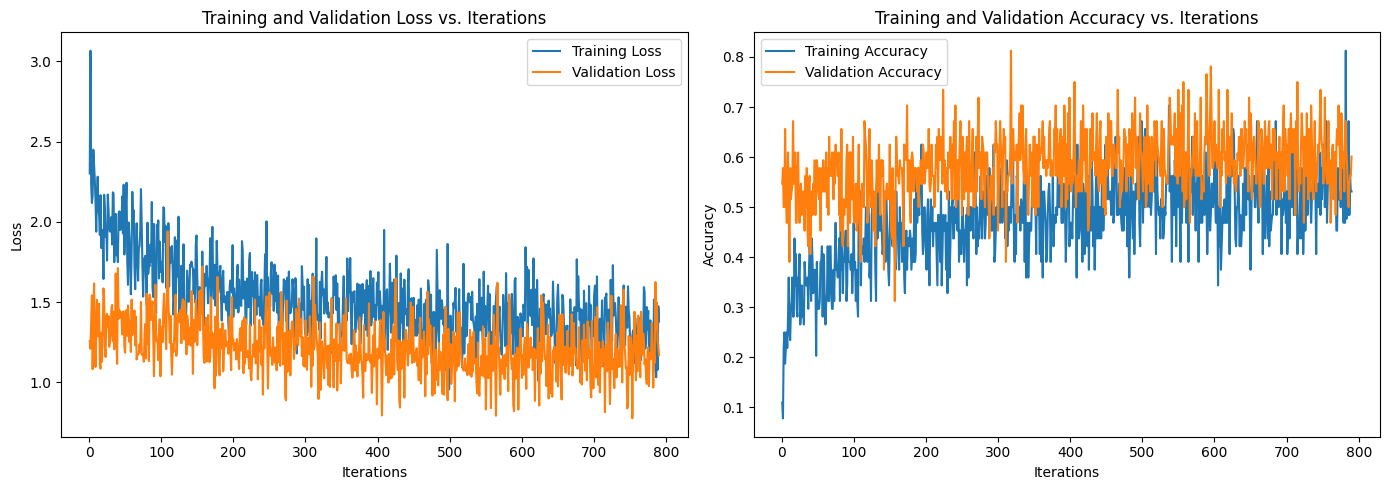

In [5]:
metrics = model.get_metrics_per_iteration()
# Plot the metrics
vis.plot_metrics(metrics)

In [10]:
metrics['train_loss'], metrics['train_accuracy'], metrics['val_loss'], metrics['val_accuracy']

[0.546875,
 0.578125,
 0.5,
 0.5,
 0.65625,
 0.5625,
 0.46875,
 0.46875,
 0.609375,
 0.5,
 0.390625,
 0.578125,
 0.515625,
 0.53125,
 0.546875,
 0.671875,
 0.546875,
 0.5625,
 0.609375,
 0.46875,
 0.46875,
 0.578125,
 0.609375,
 0.515625,
 0.46875,
 0.53125,
 0.546875,
 0.484375,
 0.53125,
 0.53125,
 0.5,
 0.453125,
 0.5625,
 0.5,
 0.578125,
 0.453125,
 0.421875,
 0.546875,
 0.5625,
 0.40625,
 0.5,
 0.53125,
 0.484375,
 0.546875,
 0.53125,
 0.59375,
 0.484375,
 0.53125,
 0.59375,
 0.578125,
 0.53125,
 0.515625,
 0.578125,
 0.453125,
 0.546875,
 0.578125,
 0.53125,
 0.59375,
 0.53125,
 0.578125,
 0.53125,
 0.609375,
 0.5,
 0.578125,
 0.484375,
 0.640625,
 0.5625,
 0.59375,
 0.5625,
 0.609375,
 0.578125,
 0.515625,
 0.609375,
 0.546875,
 0.625,
 0.59375,
 0.59375,
 0.5625,
 0.609375,
 0.484375,
 0.578125,
 0.453125,
 0.65625,
 0.4375,
 0.421875,
 0.515625,
 0.484375,
 0.515625,
 0.5,
 0.59375,
 0.625,
 0.421875,
 0.5625,
 0.609375,
 0.46875,
 0.609375,
 0.5625,
 0.515625,
 0.640625,
 0.4

In [7]:
# Load the saved model for later use
model = cnn.CustomCNN()  # Ensure the model architecture matches
model.load_state_dict(torch.load('mini_cnn_model.pth'))
model.to(device)
model.eval()
print("Model loaded successfully for evaluation.")

Model loaded successfully for evaluation.
